<a 
 href="https://colab.research.google.com/github/LearnPythonWithRune/MachineLearningWithPython/blob/main/colab/final/00 - Project - k-Nearest-Neighbor Classifier (KNN).ipynb"
 target="_parent">
<img 
 src="https://colab.research.google.com/assets/colab-badge.svg"
alt="Open In Colab"/>
</a>

# Project - $k$-Nearest-Neighbors Classifier
- Create a $k$-Nearest-Neighbors Classifier supporting 3 dimensions
- Investigate whether it performs better

### Step 1: Import libraries

In [65]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [66]:
from google.colab import drive
drive.mount('/content/mydrive/')

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).


### Step 2: Read data
- Use pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/weather.csv**
- HINT: Use **parse_dates=True** and **index_col=0**

In [67]:
data = pd.read_csv('/content/mydrive/MyDrive/MachineLearningWithPython/files/weather.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3337 non-null   object 
 1   MinTemp        3334 non-null   float64
 2   MaxTemp        3335 non-null   float64
 3   Rainfall       3331 non-null   float64
 4   Evaporation    3286 non-null   float64
 5   Sunshine       3321 non-null   float64
 6   WindGustDir    2301 non-null   object 
 7   WindGustSpeed  2301 non-null   float64
 8   WindDir9am     3281 non-null   object 
 9   WindDir3pm     3304 non-null   object 
 10  WindSpeed9am   3311 non-null   float64
 11  WindSpeed3pm   3312 non-null   float64
 12  Humidity9am    3323 non-null   float64
 13  Humidity3pm    3324 non-null   float64
 14  Pressure9am    3317 non-null   float64
 15  Pressure3pm    3318 non-null   float64
 16  Cloud9am       2771 non-null   float64
 17  Cloud3pm       2776 non-null   float64
 18  Temp9am 

#### **parse_date**
- default: `False`
- if True -> try parsing the index

In [68]:
data = pd.read_csv('/content/mydrive/MyDrive/MachineLearningWithPython/files/weather.csv', parse_dates=True)
data.info() # 'Date' column이 datetime type으로 바뀌지 않음 (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3337 non-null   object 
 1   MinTemp        3334 non-null   float64
 2   MaxTemp        3335 non-null   float64
 3   Rainfall       3331 non-null   float64
 4   Evaporation    3286 non-null   float64
 5   Sunshine       3321 non-null   float64
 6   WindGustDir    2301 non-null   object 
 7   WindGustSpeed  2301 non-null   float64
 8   WindDir9am     3281 non-null   object 
 9   WindDir3pm     3304 non-null   object 
 10  WindSpeed9am   3311 non-null   float64
 11  WindSpeed3pm   3312 non-null   float64
 12  Humidity9am    3323 non-null   float64
 13  Humidity3pm    3324 non-null   float64
 14  Pressure9am    3317 non-null   float64
 15  Pressure3pm    3318 non-null   float64
 16  Cloud9am       2771 non-null   float64
 17  Cloud3pm       2776 non-null   float64
 18  Temp9am 

#### **index_col**
- default : `None`
- Column to use as the row labels of the DataFrame
- `index_col=0` : `data.iloc[:, 0]`을 row DataFrame의 row labels로 지정

In [69]:
data.iloc[:, 0] # data['Date']와 동치

0       2008-02-01
1       2008-02-02
2       2008-02-03
3       2008-02-04
4       2008-02-05
           ...    
3332    2017-06-21
3333    2017-06-22
3334    2017-06-23
3335    2017-06-24
3336    2017-06-25
Name: Date, Length: 3337, dtype: object

In [70]:
data = pd.read_csv('/content/mydrive/MyDrive/MachineLearningWithPython/files/weather.csv', parse_dates=True, index_col=0)
data.info() # DatetimeIndex, 22 columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3337 entries, 2008-02-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        3334 non-null   float64
 1   MaxTemp        3335 non-null   float64
 2   Rainfall       3331 non-null   float64
 3   Evaporation    3286 non-null   float64
 4   Sunshine       3321 non-null   float64
 5   WindGustDir    2301 non-null   object 
 6   WindGustSpeed  2301 non-null   float64
 7   WindDir9am     3281 non-null   object 
 8   WindDir3pm     3304 non-null   object 
 9   WindSpeed9am   3311 non-null   float64
 10  WindSpeed3pm   3312 non-null   float64
 11  Humidity9am    3323 non-null   float64
 12  Humidity3pm    3324 non-null   float64
 13  Pressure9am    3317 non-null   float64
 14  Pressure3pm    3318 non-null   float64
 15  Cloud9am       2771 non-null   float64
 16  Cloud3pm       2776 non-null   float64
 17  Temp9am        3333 non-null   flo

In [71]:
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

### Step 3: Investigate data types
- Use [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)
- The goal is to identify all columns with datatype **float64** for next step

In [72]:
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

#### float64 타입이 아닌 column 빼기

In [73]:
index = data.dtypes == 'object'
index

MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir       True
WindGustSpeed    False
WindDir9am        True
WindDir3pm        True
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday         True
RISK_MM          False
RainTomorrow      True
dtype: bool

In [74]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [75]:
data.columns[index] # boolean indexing

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow'], dtype='object')

In [76]:
data.drop(data.columns[index], axis=1, inplace=True)
data.dtypes # data의 type은 object? 

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustSpeed    float64
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RISK_MM          float64
dtype: object

### Step 4: Choose 3 columns to create datasets
- Use **Humidity3pm** and **Pressure3pm** together with another column to predict **RainTomorrow**
- Make a list of three column names **'Humidity3pm', 'Pressure3pm', INSERT YOUR CHOICE** (should be one with dtype *float64*, e.g., **Cloud3pm**), and **'RainTomorrow'**
- Create the dataset consisting of these 4 columns

In [78]:
header = ['Humidity3pm', 'Pressure3pm', 'Cloud3pm', 'RainTomorrow']
dataset = data[header]

KeyError: ignored

#### KeyError: "['RainTomorrow'] not in index"
- 원인1 : `data.drop(object_columns, axis=1, inplace=True)`
- 원인2 : `data.dtypes == 'object'`
- 해결 : `object_columns` 수정

In [79]:
data = pd.read_csv('/content/mydrive/MyDrive/MachineLearningWithPython/files/weather.csv', parse_dates=True, index_col=0)
data.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

#### object_columns 수정
- `data['RainTomorrow']`가 drop되면 안된다.

In [80]:
object_columns = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'] # drop시킬 column들의 names
data.drop(object_columns, axis=1, inplace=True)
data[header] # dataset consisting of these 4 columns

,Humidity3pm,Pressure3pm,Cloud3pm,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,8.0,Yes
2008-02-02,73.0,1016.4,7.0,Yes
2008-02-03,86.0,1015.6,8.0,Yes
2008-02-04,90.0,1011.8,8.0,Yes
2008-02-05,74.0,1004.8,8.0,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,2.0,No
2017-06-22,53.0,1024.6,2.0,No
2017-06-23,56.0,1015.0,6.0,No


### Step 5: Deal with remaining missing data
- A simple choice is to simply remove rows with missing data
- Use [dropna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [81]:
Dataset = data[header]
Dataset

,Humidity3pm,Pressure3pm,Cloud3pm,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,8.0,Yes
2008-02-02,73.0,1016.4,7.0,Yes
2008-02-03,86.0,1015.6,8.0,Yes
2008-02-04,90.0,1011.8,8.0,Yes
2008-02-05,74.0,1004.8,8.0,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,2.0,No
2017-06-22,53.0,1024.6,2.0,No
2017-06-23,56.0,1015.0,6.0,No


#### remaining missing data
- [참고자료](https://www.kaggle.com/code/alexisbcook/handling-missing-values/tutorial)

In [82]:
missing_val_count_by_column = Dataset.isnull().sum()
missing_val_count_by_column[missing_val_count_by_column > 0]

Humidity3pm     13
Pressure3pm     19
Cloud3pm       561
dtype: int64

- 방법1 : from kaggle 실패 (사유: 비슷하지만 다른 문제)

In [84]:
# cols_with_missing을 rows_with_missing으로 바꾸고 
# dropna(rows_with_missing, axis=1)으로
# 수정하면 이 코드를 사용할 수 있을 것 같다.
cols_with_missing = [col for col in Dataset.columns
                     if Dataset[col].isnull().any()]
reduced_Dataset = Dataset.drop(cols_with_missing, axis=0)
reduced_Dataset

KeyError: ignored

#### 방법2 : dropna(axis=0) 성공

In [85]:
Dataset.dropna(axis=0, inplace=True)
Dataset # 3337 rows -> 2754 rows

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Humidity3pm,Pressure3pm,Cloud3pm,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,8.0,Yes
2008-02-02,73.0,1016.4,7.0,Yes
2008-02-03,86.0,1015.6,8.0,Yes
2008-02-04,90.0,1011.8,8.0,Yes
2008-02-05,74.0,1004.8,8.0,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,2.0,No
2017-06-22,53.0,1024.6,2.0,No
2017-06-23,56.0,1015.0,6.0,No


### Step 6: Create training and test datasets
- Define dataset **X** to be the data consisting of the three columns.
- Define dataset **y** to be datset cosisting of **'RainTomorrow'**.
    - HINT: Use list comprehension to transform **'No'** and **'Yes'** to 0 and 1, repectively (like in the Lesson)
- Divide into **X_train, X_test, y_train, y_test** with **train_test_split**
    - HINT: See how it is done in Lesson
    - You can use **random_state=42** (or any other number) if you want to reproduce results.

In [86]:
Dataset

,Humidity3pm,Pressure3pm,Cloud3pm,RainTomorrow
Date,,,,
2008-02-01,84.0,1017.4,8.0,Yes
2008-02-02,73.0,1016.4,7.0,Yes
2008-02-03,86.0,1015.6,8.0,Yes
2008-02-04,90.0,1011.8,8.0,Yes
2008-02-05,74.0,1004.8,8.0,Yes
...,...,...,...,...
2017-06-21,52.0,1025.3,2.0,No
2017-06-22,53.0,1024.6,2.0,No
2017-06-23,56.0,1015.0,6.0,No


#### features X

In [87]:
X = Dataset.loc[:, :'Cloud3pm']
X # X consist of the first three columns

,Humidity3pm,Pressure3pm,Cloud3pm
Date,,,
2008-02-01,84.0,1017.4,8.0
2008-02-02,73.0,1016.4,7.0
2008-02-03,86.0,1015.6,8.0
2008-02-04,90.0,1011.8,8.0
2008-02-05,74.0,1004.8,8.0
...,...,...,...
2017-06-21,52.0,1025.3,2.0
2017-06-22,53.0,1024.6,2.0
2017-06-23,56.0,1015.0,6.0


#### target y

In [88]:
y = Dataset.loc[:, 'RainTomorrow']
y # y cosist of 'RainTomorrow'

Date
2008-02-01    Yes
2008-02-02    Yes
2008-02-03    Yes
2008-02-04    Yes
2008-02-05    Yes
             ... 
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
2017-06-25     No
Name: RainTomorrow, Length: 2754, dtype: object

####  label encoding
- transform 'No' and 'Yes' to 0 and 1, repectively

- 방법1 : [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) (Encode target labels with value between 0 and n_classes-1.)

In [89]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
le.classes_ # non-numerical labels

array(['No', 'Yes'], dtype=object)

In [90]:
encoded_labels = le.fit_transform(y)
encoded_labels

array([1, 1, 1, ..., 0, 0, 0])

In [115]:
pd.Series(encoded_labels).unique(return_counts=True)

TypeError: ignored

- 방법2: Rune's way

In [91]:
"""
X = dataset_clean[header[:3]]
y = dataset_clean[header[3]]
"""
# y = np.array([0 if value == 'No' else 1 for value in y])
#y # got exactly same result with method 1

'\nX = dataset_clean[header[:3]]\ny = dataset_clean[header[3]]\n'

#### Holdout Cross Validation을 위한 split

In [92]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

### Step 7: Train and test the model
- Create classifier with **KNeighborsClassifier**
    - You can play around with n_neighbors (default =5)
- Fit the model with training data **(X_train, y_train**)
- Predict data from **X_test** (use predict) and assign to **y_pred**.
- Evalute score by using **metrics.accuracy_score(y_test, y_pred)**.

In [93]:
knn = KNeighborsClassifier(n_neighbors=6) # 임의로 수정 to 6
X_train

,Humidity3pm,Pressure3pm,Cloud3pm
Date,,,
2009-09-06,58.0,1014.0,1.0
2010-03-29,56.0,1016.4,8.0
2013-06-09,63.0,1024.3,7.0
2013-04-14,54.0,1010.9,2.0
2013-11-01,61.0,1020.2,7.0
...,...,...,...
2014-06-01,70.0,1018.0,8.0
2012-10-07,32.0,1013.7,1.0
2012-11-11,45.0,1026.6,2.0


In [94]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_valid)
y_pred

#### inverse_transform 연습

In [97]:
# LabelEncoder 연습 삼아 y_pred를 inverse_transform해보자
le.inverse_transform(y_pred[0])

ValueError: ignored

In [108]:
# 1d array인 y_pred를 역전환
le.inverse_transform(y_pred)

ValueError: ignored

In [109]:
# 학습이 끝난 knn모델이 
# validation set의 첫 번째 sample에 대해서 뭐라고 predict했는지 궁금하다
print("예측 : ", le.inverse_transform(y_pred)[0])
print("정답 : ", y_valid[0])

ValueError: ignored

#### y contains previously unseen labels: ['No' 'Yes']
- 원인1 : train_test_split(X, `y`, random_state=42)
- 원인2 : label encoding한 label(`encoded_labels`)이 아닌 `y`를 train_test_split에 전달했기 때문
- 해결 :  train_test_split(X, `encoded_labels`, random_state=42)

In [116]:
encoded_labels

array([1, 1, 1, ..., 0, 0, 0])

In [117]:
X_train, X_valid, y_train, y_valid = train_test_split(X, encoded_labels, random_state=42)

In [118]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_valid)
y_pred[:5]

array([0, 0, 1, 0, 0])

In [119]:
le.inverse_transform(y_pred)[:5]

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [120]:
le.inverse_transform(y_valid)[:5] 

array(['No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [ ]:
"""
print('y_true : ', le.inverse_transform(y_valid)[:5])
print('y_pred : ', le.inverse_transform(y_pred)[:5])
"""

ValueError: y contains previously unseen labels: [2 3]???????????

In [124]:
len(y_pred)

689

#### [accuracy_score 1](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [accuracy_score user guide](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- subset accuracy?

The accuracy_score function computes the accuracy, either the fraction(default) or the mount of the count (normalize=False) of correct predictions.

In multilabel classfication, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

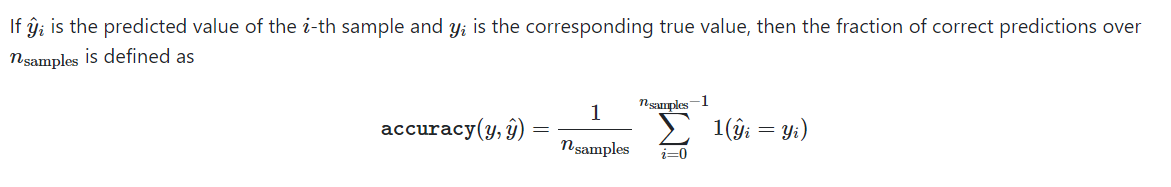

**parameters**
- `y_true` : 1d array, truth(correct) labels
- `y_pred` : predicted labels
- `normalize` : bool, default=True


**Returns**
<br>
If `normalize == True`, return the fraction of correctly classified samples (float), else returns the number of correctly classified samples (int).

example

In [ ]:
import numpy as np
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]

metrics.accuracy_score(y_true, y_pred) # 0.5 = 2 / 4 
# the number of correctly classified samples : 2
# number of all samples : 4
# formula : if normalize=True, then 
#   number of correctly classified samples / number of all samples

In [ ]:
metrics.accuracy_score(y_true, y_pred, normalize=False) # the number of correctly classified samples

In [122]:
metrics.accuracy_score(y_pred=le.inverse_transform(y_pred),
                       y_true=le.inverse_transform(y_valid),
                       normalize=True)

0.8127721335268505

In [123]:
metrics.accuracy_score(y_pred=le.inverse_transform(y_pred),
                       y_true=le.inverse_transform(y_valid),
                       normalize=False) # the number of correctly classified samples

560

In [ ]:
metrics.accuracy_score(y_pred, y_valid) # 약 82%의 정확도로 비가 온다 안온다를 예측했다.  

Rune : "The cloud measurement at 3pm actually add some accuracy to it"
같은 결론은 위험하다. 샘플 수가 줄어 든 것이 accuracy를 향상시켰을 수도 있기 때문이다.

Higly advise you to play around with this.

Rune : It's not the goal to get 100% down there.

In [ ]:
"""
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
metrics.accuracy_score(y_test, y_pred)
"""

### Step 8 (Optional): Try with different columns
- You can redo with diffrent choise of columns (starting from step 4)

In [ ]:
data.dtypes

In [ ]:
header = ['WindSpeed9am', 'Pressure9am', 'Cloud9am', 'RainTomorrow']
dataset = data[header]

In [ ]:
dataset.head()

In [ ]:
dataset_clean = data.dropna()
len(dataset), len(dataset_clean)

In [ ]:
X = dataset_clean[header[:3]]
y = dataset_clean[header[3]]
y = np.array([0 if value == 'No' else 1 for value in y])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
metrics.accuracy_score(y_test, y_pred)